In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Data Science\Data Analysis Portfolio project\Correlation in Python Project\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [5]:
#replacing null values with 0 

df['budget'] = df['budget'].fillna(0)
df['rating'] = df['rating'].fillna(0)
df['gross'] = df['gross'].fillna(0)


In [6]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))


name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [8]:
#change budget and gross to int 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#create new year column as the released year and year column does not match

df['corrected_year'] = df['released'].astype(str).str[:20]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (Unite"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (Unite"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (Unite"


In [11]:
#sort values by gross

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (U"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (Unit"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (U"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (U"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (Unit"


In [12]:
#pd.set_option('display.max_rows', None) #Displays all the data instead of head

In [24]:
#drop duplicate values

#df['company'].drop_duplicates().sort_values(ascending = False)
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,533,6,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,665
7445,535,6,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,172
3045,6896,6,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,673
6663,5144,6,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,667
7244,536,6,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,180


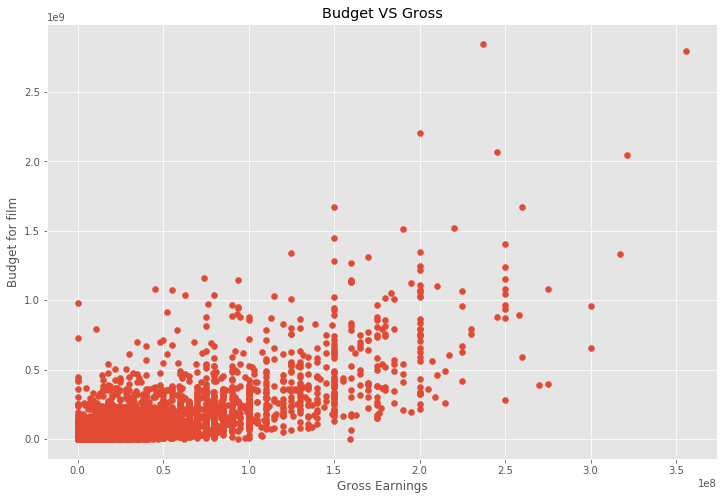

In [14]:
#scaltter plot for budget and gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title("Budget VS Gross")

plt.xlabel("Gross Earnings")
plt.ylabel("Budget for film")

plt.show()

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (U"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (Unit"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (U"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (U"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (Unit"


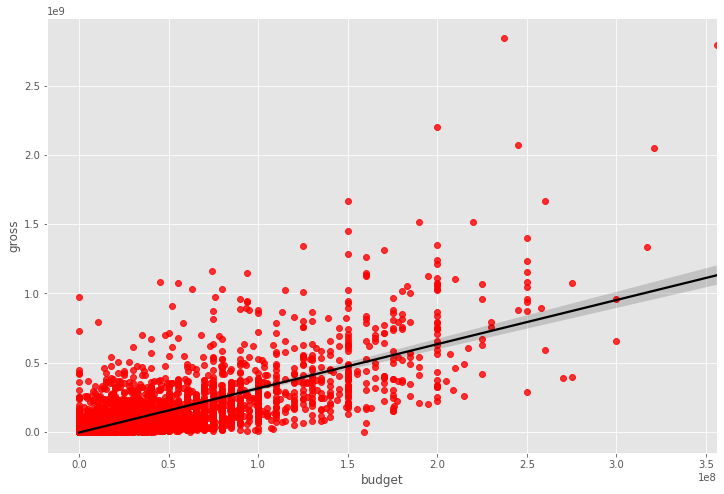

In [16]:
#budget vs gross using seaborn

sns.regplot(x ='budget', y='gross', data = df, scatter_kws= {"color":"red"}, line_kws= {"color":"black"})

In [17]:
#correlations

df.corr(method = 'pearson') #pearson ,kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


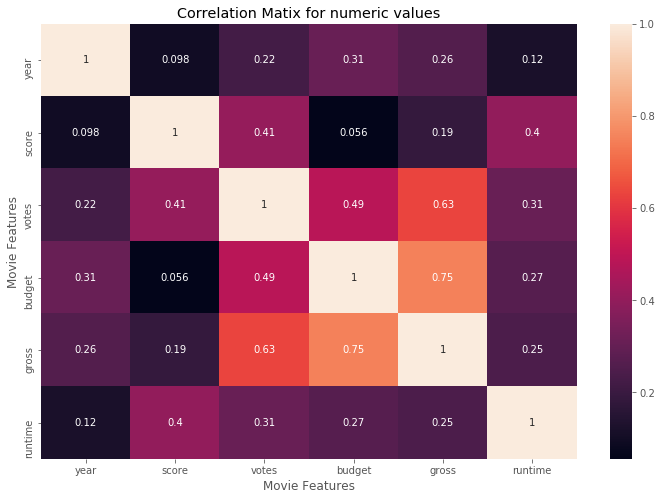

In [18]:
#visualization for the above correlation 

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix , annot = True) #annot displays the number inside the color box

plt.title("Correlation Matix for numeric values")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [19]:
#converting all the string(objects) into numeric

df_numerized = df

for col_name in df_numerized:
    if(df_numerized[col_name].dtype == object):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(15)
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
5445,533,6,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,665
7445,535,6,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,172
3045,6896,6,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,673
6663,5144,6,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,667
7244,536,6,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,180
7480,6194,5,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0,1429
6653,2969,6,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0,1641
6043,5502,6,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0,2374
6646,2145,6,0,2015,221,7.1,370000.0,1189,706,2721,55,190000000,1515341399,2281,137.0,209
7494,2131,5,2,2019,2676,6.8,148000.0,432,1950,1527,55,150000000,1450026933,2315,103.0,2565


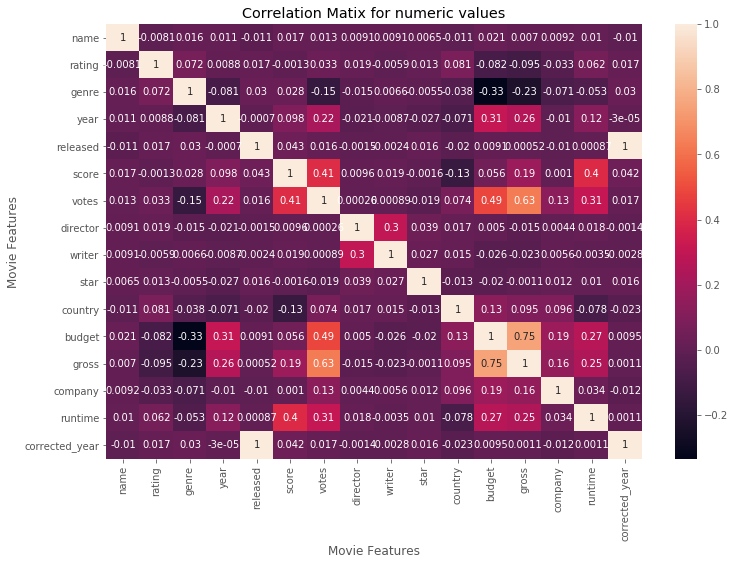

In [20]:
#correlation for all numerized data

correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix , annot = True) #annot displays the number inside the color box

plt.title("Correlation Matix for numeric values")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [21]:
#arrange high correlation wise using unstack 

correlation_matrix =  df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                year              0.011453
                released         -0.011311
                                    ...   
corrected_year  budget            0.009541
                gross             0.001084
                company          -0.011889
                runtime           0.001057
                corrected_year    1.000000
Length: 256, dtype: float64

In [22]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget          genre            -0.334021
genre           budget           -0.334021
                gross            -0.234297
gross           genre            -0.234297
genre           votes            -0.145307
                                    ...   
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
Length: 256, dtype: float64

In [23]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

votes           gross             0.632834
gross           votes             0.632834
                budget            0.750157
budget          gross             0.750157
corrected_year  released          0.998448
released        corrected_year    0.998448
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64

### Votes and gross have the highest correlation to gross earnings

### Company has low correlation